## **EDA - Dataset de Reseñas de Google**

1.  Análisis de Ratings y Reviews
- ¿Cuáles son los estados con mejores calificaciones promedio?
- ¿Cuáles tienen más cantidad de reviews?

2. Distribución de ratings por estado y por categoría de negocio.
- ¿Hay alguna relación entre el número de reviews y la calificación promedio?

3.  Análisis de Locales
- ¿Qué tipo de locales tienen mejor rating (avg_rating)?
- ¿Qué categorías tienen mayor cantidad de reviews?
- ¿Los locales con precios más altos ($$$) tienden a tener mejores reviews?
- ¿Los locales con más servicios (Service options) tienen mejores calificaciones?

4. Análisis Geográfico
- ¿Existen patrones de calificación por ubicación (ejemplo: estados del sur vs. norte)?
- ¿Qué estados tienen la mayor cantidad de locales altamente calificados?

5. Identificación de Atributos Destacados
- ¿Qué características (MISC) están presentes en los mejores locales?
- ¿Los locales con opciones de accesibilidad o pago digital tienen mejores reviews?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
review_california = pd.read_json('d:\\Desktop\\datasets_originales\\google\\reviews_california_1.json', lines=True)
metadata_sitios_1 = pd.read_json('d:\\Desktop\\datasets_originales\\google\\metadata_sitios_1.json', lines=True)

In [3]:
metadata_sitios_1.head(1)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.3883,-83.3571,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...


In [4]:
review_california.head(1)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49


### ETL PARA EMPEZAR HACER EL EDA Y ELEJIR LOS DATOS

In [5]:
# Transformaciones en df_reviews
review_california["time"] = pd.to_datetime(review_california["time"], unit="ms")  # Convertir a fecha
review_california.drop(columns=["pics", "resp"], inplace=True)  # Eliminar columnas no necesarias

# Transformaciones en df_metadata
metadata_sitios_1["state"] = metadata_sitios_1["address"].str.extract(r', (\w{2}) \d{5}')  # Extraer estado
metadata_sitios_1["price"] = metadata_sitios_1["price"].astype(str).str.len()

metadata_sitios_1["es_popular"] = (metadata_sitios_1["num_of_reviews"] > 50) & (metadata_sitios_1["avg_rating"] > 4.0)  # Marcar populares

# Expandir categorías en múltiples filas
df_categories = metadata_sitios_1.explode("category")  # Una fila por categoría

# Expandir MISC en columnas
misc_df = metadata_sitios_1["MISC"].apply(pd.Series)
metadata_sitios_1 = pd.concat([metadata_sitios_1.drop(columns=["MISC"]), misc_df], axis=1)

# Ver estructura final
print(review_california.head())
print(metadata_sitios_1.head())


        user_id           name                    time  rating  \
0  1.089912e+20        Song Ro 2021-01-06 05:12:07.056       5   
1  1.112903e+20    Rafa Robles 2021-02-09 05:47:28.663       5   
2  1.126404e+20      David Han 2020-03-08 05:04:42.296       4   
3  1.174403e+20    Anthony Kim 2019-03-07 05:56:56.355       5   
4  1.005808e+20  Mario Marzouk 2017-05-16 05:01:41.933       5   

                                               text  \
0                      Love there korean rice cake.   
1                                    Good very good   
2  They make Korean traditional food very properly.   
3                    Short ribs are very delicious.   
4      Great food and prices the portions are large   

                                 gmap_id  
0  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
1  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
2  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
3  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
4  0x80c2c778e3b73d33:0xbdc58662a4a97d49  
              

### 2️⃣ Distribución de Ratings y Reviews

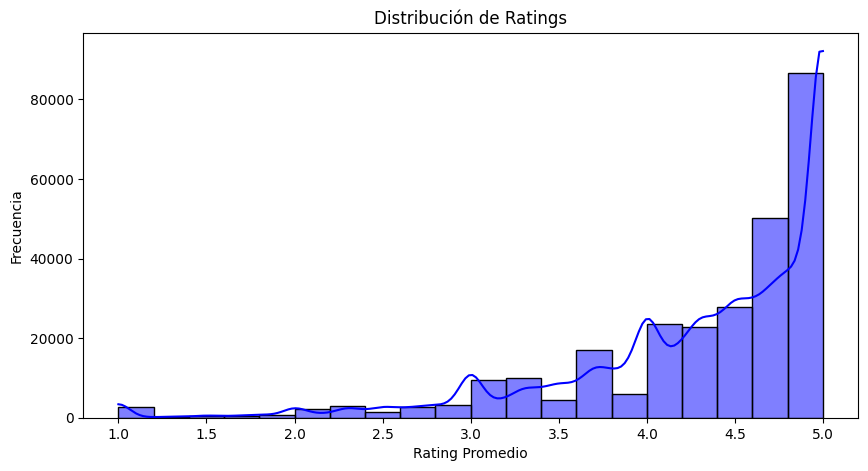

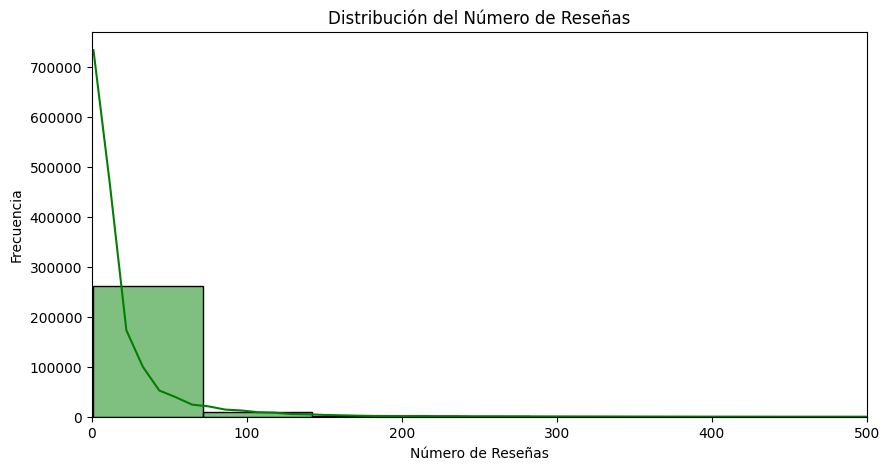

In [6]:
# Distribución de ratings
plt.figure(figsize=(10,5))
sns.histplot(metadata_sitios_1["avg_rating"], bins=20, kde=True, color="blue")
plt.title("Distribución de Ratings")
plt.xlabel("Rating Promedio")
plt.ylabel("Frecuencia")
plt.show()

# Distribución del número de reviews
plt.figure(figsize=(10,5))
sns.histplot(metadata_sitios_1["num_of_reviews"], bins=30, kde=True, color="green")
plt.title("Distribución del Número de Reseñas")
plt.xlabel("Número de Reseñas")
plt.ylabel("Frecuencia")
plt.xlim(0, 500)  # Limitar para evitar sesgo por valores extremos
plt.show()



### 3️⃣ Negocios Más y Menos Populares

In [7]:
# Negocios con más reviews
top_reviews = metadata_sitios_1.nlargest(10, "num_of_reviews")[["name", "num_of_reviews", "avg_rating"]]
print("🔝 Top 10 negocios con más reviews:")
print(top_reviews)

# Negocios con mejor calificación y más de 50 reviews
top_rated = metadata_sitios_1[(metadata_sitios_1["num_of_reviews"] > 50)].nlargest(10, "avg_rating")[["name", "avg_rating", "num_of_reviews"]]
print("\n🌟 Top 10 negocios mejor calificados (con más de 50 reviews):")
print(top_rated)


🔝 Top 10 negocios con más reviews:
                                                    name  num_of_reviews  \
218394                                  RV Parts Country            2114   
11274                                       Chapel Hills            1837   
37847                                       Chapel Hills            1837   
119164                                       Agua Dental            1688   
82872                              St. Joseph's Hospital            1618   
129743                       Rodeo Dental & Orthodontics            1548   
169562                              Celebrity Home Loans            1268   
271025                    Bayou Pawn & Jewelry - Hammond            1268   
88723                   Notaria Latina - Queens New York            1114   
199883  Diamond Braces Orthodontist: Braces & Invisalign            1038   

        avg_rating  
218394         4.1  
11274          4.0  
37847          4.0  
119164         5.0  
82872          4.1  
12

### 4️⃣ Calificación Promedio por Estado

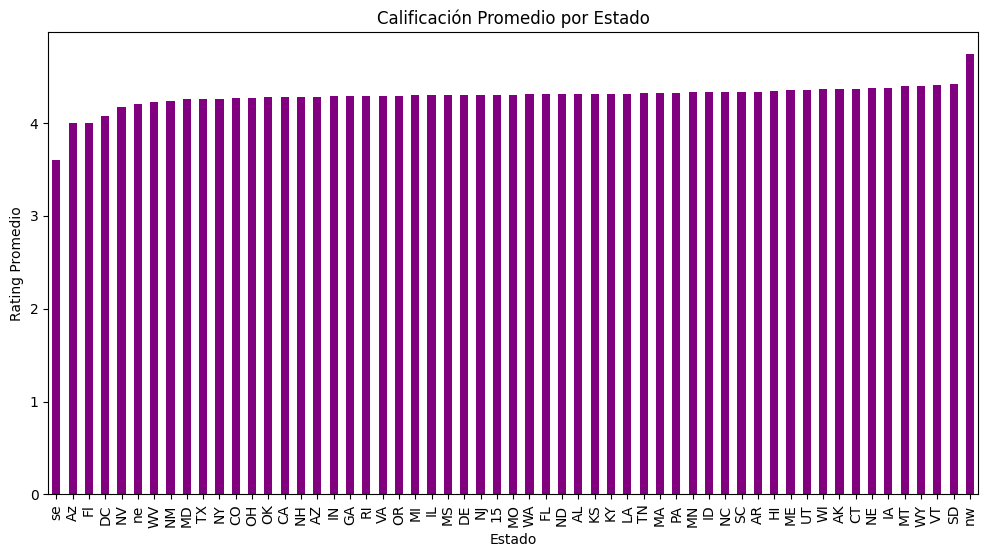

In [8]:
# Rating promedio por estado
estado_ratings = metadata_sitios_1.groupby("state")["avg_rating"].mean().sort_values()

plt.figure(figsize=(12,6))
estado_ratings.plot(kind="bar", color="purple")
plt.title("Calificación Promedio por Estado")
plt.xlabel("Estado")
plt.ylabel("Rating Promedio")
plt.xticks(rotation=90)
plt.show()


### 5️⃣ Relación entre Número de Reseñas y Calificación

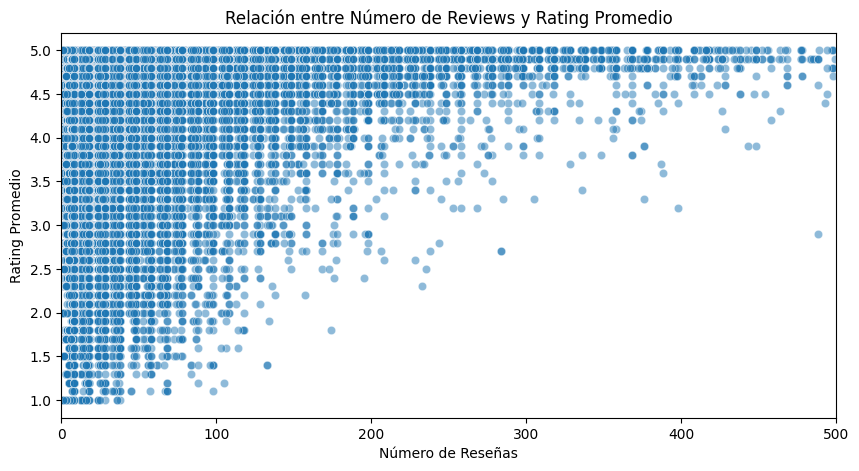

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=metadata_sitios_1["num_of_reviews"], y=metadata_sitios_1["avg_rating"], alpha=0.5)
plt.title("Relación entre Número de Reviews y Rating Promedio")
plt.xlabel("Número de Reseñas")
plt.ylabel("Rating Promedio")
plt.xlim(0, 500)  # Limitar para ver mejor la relación
plt.show()


### 6️⃣ Categorías Más Comunes


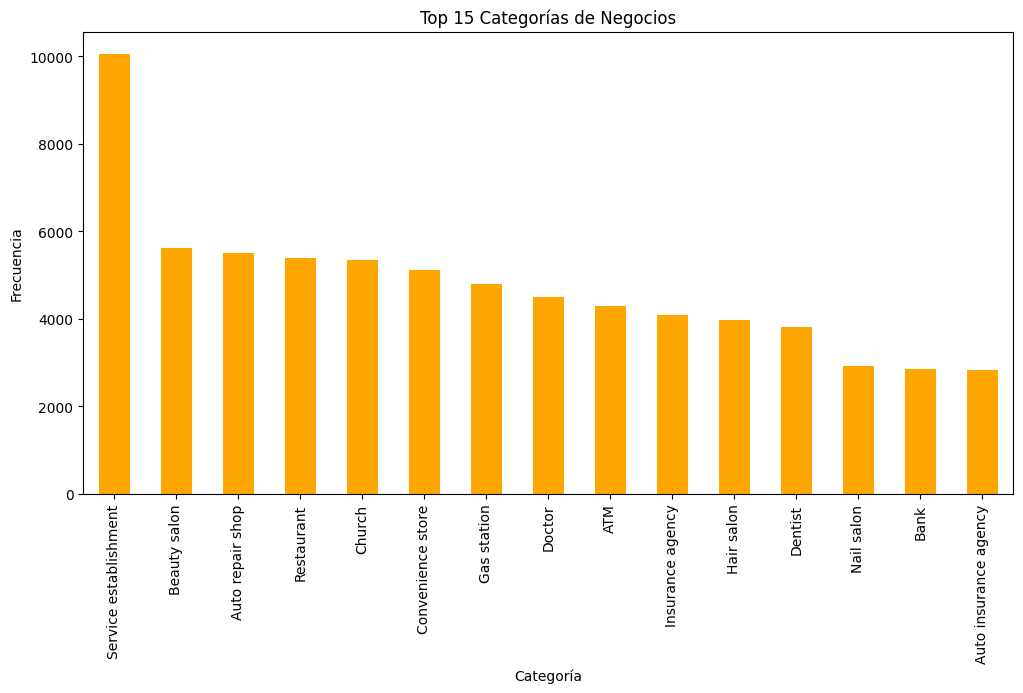

In [10]:
# Contar frecuencia de categorías
top_categorias = df_categories["category"].value_counts().head(15)

plt.figure(figsize=(12,6))
top_categorias.plot(kind="bar", color="orange")
plt.title("Top 15 Categorías de Negocios")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()


## Recomendaciones para el Inversor
A partir del análisis, responder:

- **¿En qué estados es más recomendable invertir?**
- **¿Qué tipo de locales tienen mejor desempeño?**
- **¿Qué atributos deberían priorizarse en un nuevo local?**
- **¿Cómo impacta la ubicación en la calificación y rentabilidad?**